In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Carga fichero


In [82]:
df_original = pd.read_csv("../Data\Raw\ds_salaries.csv")

In [83]:
df_original.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [84]:
df_original["work_year"].unique()

array([2023, 2022, 2020, 2021], dtype=int64)

In [85]:
#pd.set_option('display.max_rows', 1000)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [86]:
df_original[["job_title"]].value_counts().head(90)

job_title                 
Data Engineer                 1040
Data Scientist                 840
Data Analyst                   612
Machine Learning Engineer      289
Analytics Engineer             103
                              ... 
Deep Learning Researcher         1
Data Management Specialist       1
Data DevOps Engineer             1
Compliance Data Analyst          1
Cloud Data Architect             1
Length: 90, dtype: int64

In [87]:
df_original["employee_residence"].value_counts()

US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64

In [88]:
df_original.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [89]:
df_original[df_original["employee_residence"] != df_original["company_location"]]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
81,2023,SE,FT,Machine Learning Engineer,150000,USD,150000,PT,100,US,M
82,2023,MI,FT,Applied Machine Learning Engineer,65000,EUR,69751,IN,100,DE,S
183,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M
218,2023,SE,FT,Applied Data Scientist,100000,AUD,68318,AU,100,FI,M
249,2022,SE,FT,Data Scientist,84000,EUR,88256,ES,100,GB,L
...,...,...,...,...,...,...,...,...,...,...,...
3729,2021,EN,FT,AI Scientist,1335000,INR,18053,IN,100,AS,S
3731,2020,MI,FT,Data Scientist,55000,EUR,62726,FR,50,LU,S
3735,2021,EN,PT,AI Scientist,12000,USD,12000,BR,100,US,S
3743,2020,MI,FT,Data Engineer,130800,USD,130800,ES,100,US,M


In [90]:
#creacion columna trabajadores residentes o no de pais procedencia empresa

#df_original['mismatch'] = np.where(df_original['employee_residence'] != df_original['company_location'], 1, 0)
#sns.heatmap(df_original.corr(), annot = True)
#El hecho de si el pais de residencia y el de precedencia de la compañia son el mismo no tiene correlacion con el salario, decidimos no usar la variable.

## Cambio usd a eur

In [91]:
tasa_cambio = 0.92

df_original["salario_eur"] = df_original["salary_in_usd"] * tasa_cambio
df_original.drop(columns=["salary", 'salary_currency', 'salary_in_usd'], inplace=True)

In [92]:
df_original["job_title"].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [93]:
#Lista de palabras sustituibles
patterns = {
    'scientist': 1,
    'Data Science':1,
    'cloud': 2,
    'Data Analyst':3,
    'Data Analytics':3,
    'Data Engineer':3,
    'Data Strategist':3,
    'Machine Learning' : 4,
    'ML' : 4,
    'AI':4,
    'MLOps': 4,
    'Head': 5,}

default_value = 6  #valor para los que no cumplan patterns

# Crea la nueva columna y asigna el valor predeterminado (0)
df_original['job_title_map'] = 0

# Itera sobre los patrones y actualiza los valores en la nueva columna
for pattern, value in patterns.items():
    df_original.loc[df_original['job_title'].str.contains(pattern, case=False), 'job_title_map'] = value


In [95]:
df_original.isnull().value_counts()  #comprobamos que no quedasen jot titles sin sustituir

work_year  experience_level  employment_type  job_title  employee_residence  remote_ratio  company_location  company_size  salario_eur  job_title_map
False      False             False            False      False               False         False             False         False        False            3755
dtype: int64

In [77]:
#formula para hacerla media de salario por pais y ordenar los paises de salario medio > a menor. 
def apply_rank_encoding(df, column_name):
    mean_encoding = df.groupby(column_name)['salario_eur'].mean().round()
    mean_encoding_sorted = mean_encoding.sort_values(ascending=False)
    ranked_values = mean_encoding_sorted.rank(method='first').astype(int)
    
    mapping = {value: rank for rank, value in enumerate(ranked_values, start=1)}
    mapped_values = ranked_values.map(mapping)
    
    mapping_dict = dict(zip(mean_encoding_sorted.index, mapped_values))
    df[column_name] = df[column_name].replace(mapping_dict)
    
    return df

In [97]:
apply_rank_encoding(df_original, "employee_residence")

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salario_eur,job_title_map
0,2023,SE,FT,Principal Data Scientist,40,100,ES,L,78979.24,1
1,2023,MI,CT,ML Engineer,4,100,US,S,27600.00,4
2,2023,MI,CT,ML Engineer,4,100,US,S,23460.00,4
3,2023,SE,FT,Data Scientist,5,100,CA,M,161000.00,1
4,2023,SE,FT,Data Scientist,5,100,CA,M,110400.00,1
...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,4,100,US,L,379040.00,1
3751,2021,MI,FT,Principal Data Scientist,4,100,US,L,138920.00,1
3752,2020,EN,FT,Data Scientist,4,100,US,S,96600.00,1
3753,2020,EN,CT,Business Data Analyst,4,100,US,L,92000.00,3


In [98]:
apply_rank_encoding(df_original, "company_location")

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salario_eur,job_title_map
0,2023,SE,FT,Principal Data Scientist,40,100,35,L,78979.24,1
1,2023,MI,CT,ML Engineer,4,100,3,S,27600.00,4
2,2023,MI,CT,ML Engineer,4,100,3,S,23460.00,4
3,2023,SE,FT,Data Scientist,5,100,5,M,161000.00,1
4,2023,SE,FT,Data Scientist,5,100,5,M,110400.00,1
...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,4,100,3,L,379040.00,1
3751,2021,MI,FT,Principal Data Scientist,4,100,3,L,138920.00,1
3752,2020,EN,FT,Data Scientist,4,100,3,S,96600.00,1
3753,2020,EN,CT,Business Data Analyst,4,100,3,L,92000.00,3


In [101]:
df_original[("experience_level")].unique()


array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [102]:
#cambiamios experience_level
df_original["experience_level"] = df_original["experience_level"].replace({"EN": 1, "MI": 2, "SE": 3, "EX": 4})

In [25]:
df_original[("remote_ratio")].unique()

array([100,   0,  50], dtype=int64)

In [45]:
df_original[("employment_type")].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [99]:
#tipo de contrato
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Aplica la codificación de etiquetas a la columna deseada
df_original['employment_type_encoded'] = label_encoder.fit_transform(df_original['employment_type'])

In [100]:
#variables company size

size_mapping = {'S': 0, 'M': 1, 'L': 2}
df_original['company_size'] = df_original['company_size'].replace(size_mapping)

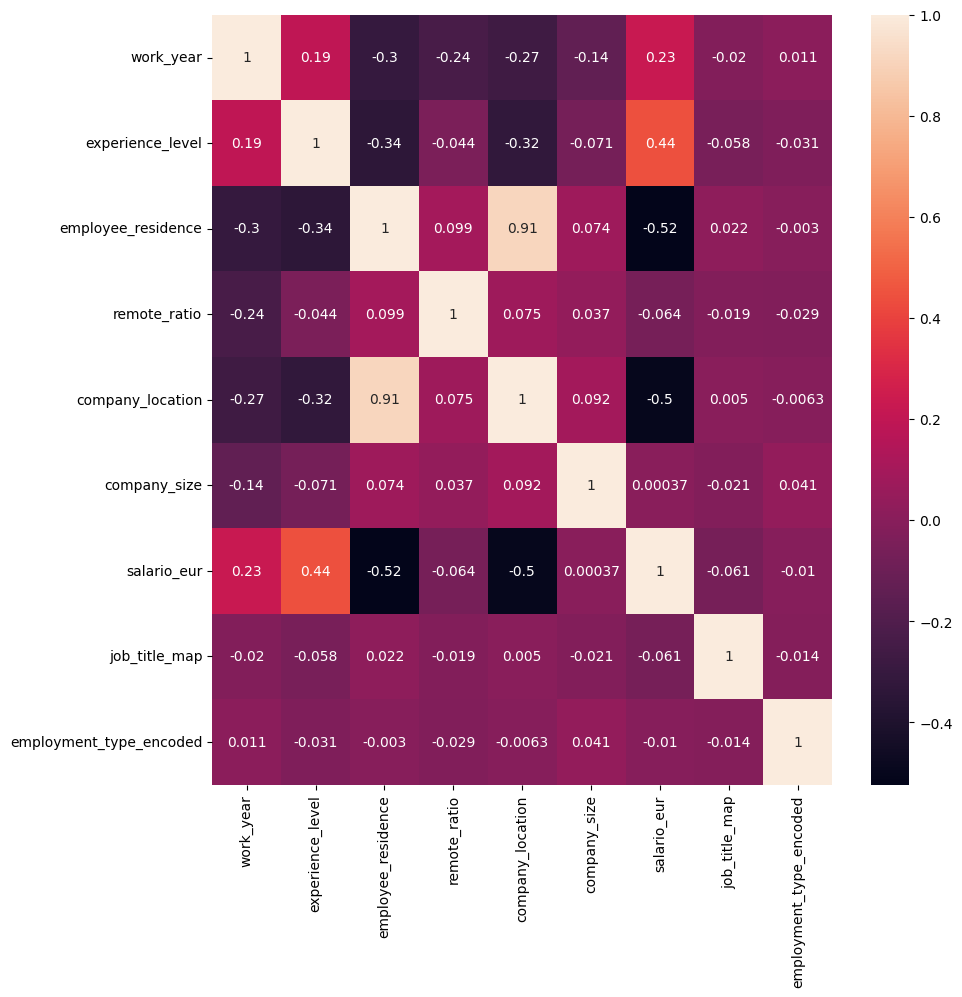

In [103]:
plt.figure(figsize = (10,10))
sns.heatmap(df_original.corr(), annot=True);

## Con el nuevo enfoque a las variables hemos mejorado la correlatividad de job title, company and employee location.

In [104]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   work_year                3755 non-null   int64  
 1   experience_level         3755 non-null   int64  
 2   employment_type          3755 non-null   object 
 3   job_title                3755 non-null   object 
 4   employee_residence       3755 non-null   int64  
 5   remote_ratio             3755 non-null   int64  
 6   company_location         3755 non-null   int64  
 7   company_size             3755 non-null   int64  
 8   salario_eur              3755 non-null   float64
 9   job_title_map            3755 non-null   int64  
 10  employment_type_encoded  3755 non-null   int32  
dtypes: float64(1), int32(1), int64(7), object(2)
memory usage: 308.2+ KB


In [107]:
#Eliminar variables redundantes.
df_processed = df_original[['work_year','salario_eur', 'experience_level', 'employment_type_encoded',
       'job_title', 'company_location', 'employee_residence',
       'company_size', 'remote_ratio']]

In [20]:
df_processed.head()

,work_year,salario_eur,experience_level_mean,employment_type_encoded,job_title_mean,company_location_mean,employee_location_mean,company_size,remote_ratio
0,2023,78979.24,140807.0,2,182317.0,53062.0,55626.0,2,100
1,2023,27600.00,96164.0,0,145684.0,139676.0,140596.0,0,100
2,2023,23460.00,96164.0,0,145684.0,139676.0,140596.0,0,100
3,2023,161000.00,140807.0,2,129600.0,121364.0,121645.0,1,100
4,2023,110400.00,140807.0,2,129600.0,121364.0,121645.0,1,100


In [21]:
df_processed.describe()

,work_year,salario_eur,experience_level_mean,employment_type_encoded,job_title_mean,company_location_mean,employee_location_mean,company_size,remote_ratio
count,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000
mean,2022.373635,126564.758690,126564.819174,1.996538,126564.710253,126564.566178,126564.529161,1.081491,46.271638
std,0.691448,58011.175256,25885.390173,0.133550,22427.652374,30135.554869,31253.429624,0.392071,48.589050
min,2020.000000,4721.440000,72263.000000,0.000000,4976.000000,5800.000000,5800.000000,0.000000,0.000000
25%,2022.000000,87400.000000,96164.000000,2.000000,125733.000000,139676.000000,140596.000000,1.000000,0.000000
50%,2022.000000,124200.000000,140807.000000,2.000000,131363.000000,139676.000000,140596.000000,1.000000,0.000000
75%,2023.000000,161000.000000,140807.000000,2.000000,131363.000000,139676.000000,140596.000000,1.000000,100.000000
max,2023.000000,414000.000000,179336.000000,3.000000,345000.000000,249731.000000,389927.000000,2.000000,100.000000


## 2. Creación csv train y test


In [51]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_original, test_size=0.2, random_state=42)

In [52]:
print(test_df.shape)
print(train_df.shape)


(751, 9)
(3004, 9)


## 3.Creación csv

In [53]:
def csv(nombre_archivo, archivo_guardar):

    ruta_archivo = '../Data/' + nombre_archivo + '.csv'
    archivo_guardar.to_csv(ruta_archivo, index=False)

In [ ]:
csv("processed", df_original)

In [54]:
csv("test", test_df)

In [55]:
csv("train", train_df)